In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy.stats as ss
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
df = pd.read_csv("data/diabetes.csv")
df = df[df["BMI"]>10]
dfD = df[df["Outcome"]==1]
dfN = df[df["Outcome"]==0]
dPos = dfD.BMI
dNeg = dfN.BMI
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Effect Size and Comparing Samples

We previously looked at how we can take data samples and generalize those to an expectation of the population, as well as a measure of our expected accuracy. We can apply similar concepts to comparing two samples to each other. When we estimated for a population we always had a confidence interval - we can't really state exactly what the population mean will be, we can only give a range and a level of certainty. A similar idea occurs when doing a comparison - we can't really just take the means of each sample and do a simple comparison, since there is that level of uncertainty if our samples really represent the population. What we need to do is to execute a comparison that incorporates that uncertainty as a factor, and rather than producing a definitive statement of difference we will produce a probabilistic one. 

This type of comparison is very common, one example is if we are running a scientific trial such as a drug trial. We want to compare the people who got the treatment with the people who didn't, and attempt to establish if that treatment casues those two samples to be different. 
# 影响大小和比较样本

我们之前研究了如何获取数据样本并将其推广到总体预期，以及我们预期准确性的度量。我们可以应用类似的概念来比较两个样本。当我们对一个总体进行估计时，我们总是有一个置信区间——我们不能真正准确地说明总体的含义是什么，我们只能给出一个范围和一定程度的确定性。在进行比较时会出现类似的想法——我们不能只取每个样本的平均值并进行简单的比较，因为如果我们的样本真的代表总体，就会存在这种程度的不确定性。我们需要做的是执行一个将不确定性作为一个因素的比较，而不是产生一个明确的差异陈述，我们将产生一个概率性的陈述。

这种比较很常见，一个例子是如果我们正在进行一项科学试验，例如药物试验。我们想将接受治疗的人和没有接受治疗的人进行比较，并试图确定这种治疗是否会导致这两个样本不同。
## Do Diabetics Have a Higher BMI than Normals?

This question is both simple and complex - it is easy to say if two things are different at a glance. Analytically though, it becomes more complex. Is that difference significant or irrelevant? Is it due to chance or because of some effect? Stating that a difference matters is not so simple...

Below we'll look at different ways that we can express an answer to this question, starting with just taking the mean/median, and finishing with effect size. 

<b>First - what are the stats?</b>


## 糖尿病患者的 BMI 是否高于正常人？

这个问题既简单又复杂——一眼就能看出两件事是否不同。但是，分析起来，它变得更加复杂。这种差异是显着的还是不相关的？是偶然还是因为某种影响？说差异很重要并不是那么简单......

下面我们将看看我们可以用不同的方式来表达这个问题的答案，首先是取平均值/中位数，最后是效果大小。

<b>首先 - 统计数据是什么？</b>

In [3]:
#Basics
print("Non-Diabetics mean and median", dNeg.mean(), dNeg.median())
print("Diabetics mean and median", dPos.mean(), dPos.median()) 
#Diabetics糖尿病患者

Non-Diabetics mean and median 30.85967413441951 30.1
Diabetics mean and median 35.40676691729318 34.3


<AxesSubplot:xlabel='BMI', ylabel='Density'>

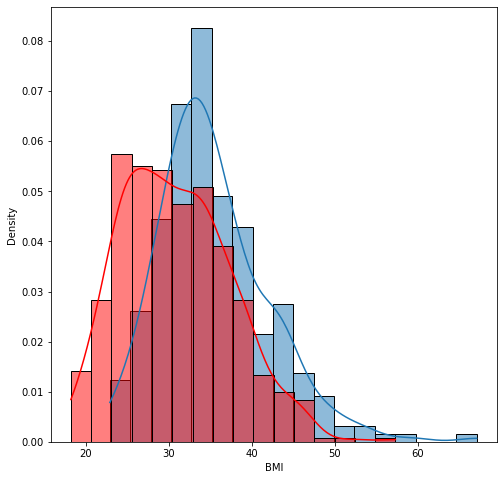

In [4]:
#plot em
sns.histplot(dPos, kde=True, stat="density")
sns.histplot(dNeg, kde=True, stat="density", color='red')


<h3>Looks pretty likely, we should test it though...</h3>

* Without knowing more about the distributions (like the standard deviations) it's hard to interpret whether a difference like this is a lot or not.

* The magnitude of the difference depends on the units of measure, making it hard to compare across different studies.

There are a number of ways to quantify the difference between distributions.  A simple option is to express the difference as a percentage of the mean.

**Exercise 1**: what is the relative difference in means, expressed as a percentage?
<h3>看起来很有可能，不过我们应该测试一下……</h3>

* 在不了解分布的更多信息（如标准差）的情况下，很难解释这样的差异是否很大。

* 差异的大小取决于测量单位，因此很难在不同研究之间进行比较。

有多种方法可以量化分布之间的差异。一个简单的选择是将差异表示为平均值的百分比。

**练习 1**：均值的相对差异是多少，以百分比表示？

In [5]:
#Compute percentage difference 
#计算百分比差异
difference_in_means = dPos.mean()-dNeg.mean()
relative_difference = difference_in_means / dPos.mean()
print(relative_difference * 100)   # percent

relative_difference = difference_in_means / dNeg.mean()
print(relative_difference * 100)   # percent

12.842439959274582
14.73474011121215


The problem here with relative differences is that you have to choose which mean to express them relative to.
<br><br>

## Part Two - Are Things Different?

Remember, what we are trying to express here when comparing two distributions is to evaluate if one is significantly different from the other. The word significant is doing a lot of work here, if one distribution is clearly, 100% bigger than the other one, that is a simple question; in every case that is worth examining, the difference is not so clear, and the distributions will overlap some, often a lot. 

We don't have a definitve calculation to express "bigger" like we would with two integers, we can measure degrees of difference between the two distributions, which is what we will do here. We can also measure the likelihood that the difference is real, and not due to randomness, which we will do in hypothesis testing in about 2 classes. 

One way to express the difference between distributions is to see how much they overlap.  To define overlap, we choose a threshold between the two means - this will allow us to calculate the ability of the two different distributions to differentiate between the classes.  The simple threshold is the midpoint between the means:
相对差异的问题是您必须选择相对于哪个意思来表达它们。
<br><br>

## 第二部分 - 有什么不同吗？

请记住，在比较两个分布时，我们在这里试图表达的是评估一个分布是否与另一个显着不同。显着这个词在这里做了很多工作，如果一个分布很明显，比另一个大 100%，这是一个简单的问题；在每个值得研究的情况下，差异并不那么明显，分布会重叠一些，通常很多。

我们没有一个明确的计算来表达“更大”，就像我们用两个整数一样，我们可以测量两个分布之间的差异程度，这就是我们在这里要做的。我们还可以测量差异是真实的可能性，而不是由于随机性，我们将在大约 2 个类别的假设检验中这样做。

表达分布之间差异的一种方法是查看它们重叠的程度。为了定义重叠，我们在两个平均值之间选择一个阈值——这将允许我们计算两个不同分布区分类别的能力。简单阈值是平均值之间的中点：

In [6]:
posMean, negMean, posSTD, negSTD, posMed, negMed = dPos.mean(), dNeg.mean(), dPos.std(), dNeg.std(), dPos.median(), dNeg.median()
simple_thresh = (posMean + negMean) / 2
simple_thresh

33.133220525856345

A better, but slightly more complicated threshold is the place where the PDFs cross.
一个更好但稍微复杂一点的阈值是 PDF 交叉的地方。

In [7]:
thresh = (posSTD * negMean + negSTD * posMean) / (posSTD + negSTD)
thresh

33.1238601540465

In this example, there's not much difference between the two thresholds.

Now we can count how many diabetics are below the threshold. Here we are making an assumption for the purposes of this investigation - we are assuming that the BMI for diabetics "should" be higher, and we are establishing evidence of if this is true or not. 
在此示例中，两个阈值之间没有太大差异。

现在我们可以计算有多少糖尿病患者低于阈值。在这里，我们出于本次调查的目的做出假设——我们假设糖尿病患者的 BMI“应该”更高，并且我们正在建立证据证明这是否正确。

In [8]:
pos_below_thresh = sum(dPos < thresh)
pos_below_thresh

109

And how many non-diabetics are above it:
以及上面有多少非糖尿病患者：

In [9]:
neg_above_thresh = sum(dNeg > thresh)
neg_above_thresh

179

The "overlap" is the area under the curves that ends up on the wrong side of the threshold.

“重叠”是曲线下方最终位于阈值错误一侧的区域。

In [10]:
pos_overlap = pos_below_thresh / len(dPos)
neg_overlap = neg_above_thresh / len(dNeg)
pos_overlap, neg_overlap

(0.40977443609022557, 0.3645621181262729)

In practical terms, you might report the fraction of people who would be misclassified if you tried to use BMI to guess diabeticness, which is the average of the positive and negative overlap rates:
实际上，如果您尝试使用 BMI 来猜测糖尿病，您可能会报告被错误分类的人的比例，这是正负重叠率的平均值：

In [11]:
misclassification_rate = (pos_overlap + neg_overlap) / 2
misclassification_rate

0.38716827710824925

Think - ideally, if the diabetic/not-diabetic split was a really good predictor of BMI we'd want this to be as discriminatory as possible. The more overlap, the less diabetic 'means' to the BMI. If the two groups are perfectly separated, the BMI would be a perfect predictor here - every diabetic BMI would be greater than every non-diabetic one. The less likely this is, the less differentiated the two groups are.想想 - 理想情况下，如果糖尿病/非糖尿病分裂是 BMI 的一个非常好的预测指标，我们希望这尽可能具有歧视性。重叠越多，对 BMI 的糖尿病“意味着”就越少。如果两组完全分开，那么 BMI 将是一个完美的预测指标 - 每个糖尿病患者的 BMI 都将大于每个非糖尿病患者的 BMI。这种可能性越小，两组的差异就越小。 

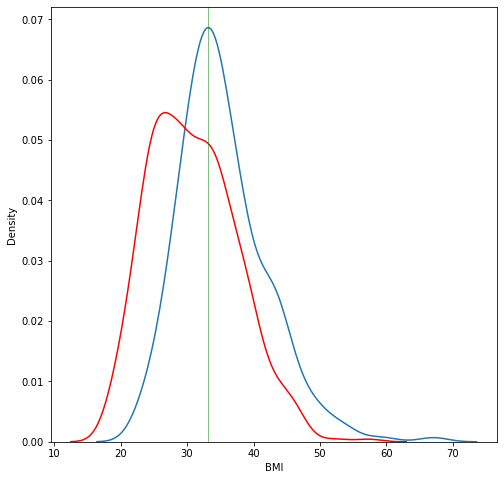

In [12]:
sns.kdeplot(dPos)
sns.kdeplot(dNeg, color='red')
thinkplot.axvline(thresh, color="green")

<b>Note: the threshold line almost hitting the peak of the curve above is just a coincidence. </b>

<b>注意：阈值线几乎达到上面曲线的峰值只是一个巧合。 </b>

##### Superiority 

Another way to quantify the difference between distributions is what's called "probability of superiority", which is a problematic term, but in this context it's the probability that a randomly-chosen diabetic has a higher BMI than a randomly-chosen non-diabetic.

**Exercise 2**:  Suppose I choose a diabetic and a normal at random.  What is the probability that the diabetic has a higher BMI?

HINT: You can `zip` the two samples together and count the number of pairs where the diabetic has a higher BMI, or use NumPy array operations.
#### 优越感

量化分布之间差异的另一种方法是所谓的“优势概率”，这是一个有问题的术语，但在这种情况下，随机选择的糖尿病患者的 BMI 高于随机选择的非糖尿病患者的概率。

**练习 2**：假设我随机选择一个糖尿病患者和一个正常人。糖尿病患者BMI较高的概率是多少？

提示：您可以将两个样本“压缩”在一起并计算糖尿病患者具有较高 BMI 的对数，或使用 NumPy 数组操作。

In [13]:
sum(x > y for x, y in zip(dPos, dNeg)) / len(dPos)

0.6654135338345865

This translates into a statement that for any two people that are selected from the two samples, the diabetic will have an X percentage probability of having an higher BMI. 
这转化为一个声明，即对于从两个样本中选择的任何两个人，糖尿病患者将有 X 百分比的概率具有更高的 BMI。

## Cohen's effect size## Cohen 的效果大小

There is one other common way to express the difference between distributions - our old friend Cohen and his Effect Size.  Cohen's $d$ is the difference in means, standardized by dividing by the standard deviation.  Here's the math notation:
还有另一种表达分布差异的常用方法——我们的老朋友科恩和他的效应大小。 Cohen 的 $d$ 是均值的差异，通过除以标准差来标准化。这是数学符号：

$ d = \frac{\bar{x}_1 - \bar{x}_2} s $

where $s$ is the pooled standard deviation:

$s = \sqrt{\frac{n_1 s^2_1 + n_2 s^2_2}{n_1+n_2}}$

Here's a function that computes it:

In [14]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Computing the denominator is a little complicated; in fact, people have proposed several ways to do it.  This implementation uses the "pooled standard deviation", which is a weighted average of the standard deviations of the two groups. We can read it to mean that the effect side is sort of the difference between the two groups, compared to the overall varaiance of all the data. So higher values indicate that the difference between the groups is "outweighing" the varaince in the values, and low effect sizes indicate that the varaiance in the values outweighs the difference in the groups. Note, this is not a technical definition, it is a way to think of it. 

And here's the result for the difference in BMI between diabetics and normals.
计算分母有点复杂；事实上，人们已经提出了几种方法来做到这一点。此实现使用“合并标准差”，它是两组标准差的加权平均值。我们可以将其解读为，与所有数据的总体方差相比，效果方面是两组之间的差异。因此，较高的值表明组之间的差异“超过”了值的方差，而低效应值表明值的方差超过了组中的差异。请注意，这不是技术定义，而是一种思考方式。

这是糖尿病患者和正常人之间 BMI 差异的结果。

In [15]:
CohenEffectSize(dPos, dNeg)

0.6910633931865521

It isn't really super obvious what this value means, unfortunately. We can use the chart of effect size meaning from Cohen that we looked at before and say that this is a medium-large effect - or the fact of someone being diabetic or not has a 'pretty big' impact on the BMI of that person. 不幸的是，这个值的含义并不是很明显。我们可以使用我们之前看过的 Cohen 的效应大小含义图表，并说这是一个中大型效应 - 或者某人是否患有糖尿病的事实对该人的 BMI 有“相当大”的影响。

![Effect Size](images/effect_size_scale.png "Effexct Size")


<h2>Visualizing what Cohen's Effect Size looks like</h2>

Here's the function that takes Cohen's $d$, plots normal distributions with the given effect size, and prints their overlap and superiority. We can look at this to get an idea of what the values we may get for Cohen are visually. 

Here's a function that encapsulates the code we already saw for computing overlap and probability of superiority.
<h2>可视化 Cohen 的效果大小是什么样的</h2>

这是采用 Cohen 的 $d$ 的函数，绘制具有给定效应大小的正态分布，并打印它们的重叠和优势。我们可以看看这个，以了解我们可能从视觉上为科恩获得的价值是什么。

这是一个函数，它封装了我们已经看到的用于计算重叠和优势概率的代码。

In [16]:
def overlap_superiority(control, treatment, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    control: scipy.stats rv object
    treatment: scipy.stats rv object
    n: sample size
    """
    control_sample = control.rvs(n)
    treatment_sample = treatment.rvs(n)
    thresh = (control.mean() + treatment.mean()) / 2
    
    control_above = sum(control_sample > thresh)
    treatment_below = sum(treatment_sample < thresh)
    overlap = (control_above + treatment_below) / n
    
    superiority = (treatment_sample > control_sample).mean()
    return overlap, superiority

In [17]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

In [18]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    control = ss.norm(0, 1)
    treatment = ss.norm(cohen_d, 1)
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label='control', color='C1', alpha=0.5)

    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label='treatment', color='C0', alpha=0.5)
    
    o, s = overlap_superiority(control, treatment)
    plt.text(0, 0.05, 'overlap ' + str(o))
    plt.text(0, 0.15, 'superiority ' + str(s))
    plt.show()
    #print('overlap', o)
    #print('superiority', s)

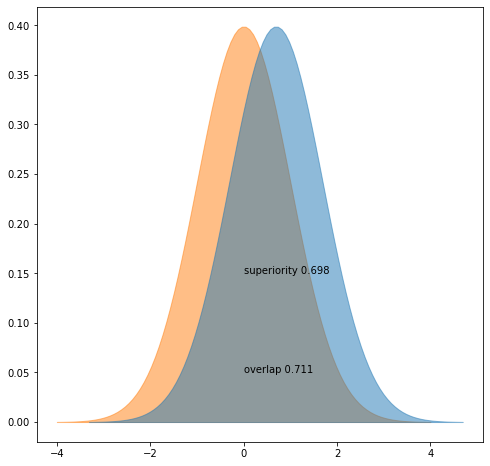

In [19]:
dCohen = CohenEffectSize(dPos, dNeg)
plot_pdfs(dCohen)

##### Results

We can get a degree of intuitive sense on how the effect size translates to the appearance on a pdf chart. Two distributions can have a statistically significant difference from each other without looking dramatically separated on a graph. 
＃＃＃＃＃ 结果

我们可以对效果大小如何转换为 pdf 图表上的外观有一定程度的直观感受。两个分布可以在统计上彼此具有显着差异，而不会在图表上看起来明显分开。
##### Adjustable Cohen

The chart below does the same basic thing, but we can use a little widget in Python that allows us to edit the value for the effect size dynamically. This is stuff that comes from the ipywidgets stuff imported above. We can use stuff like this to make interactive bits, pretty easily - here we replace the input to the Cohen Effect Size paramater with the value from the little slide object, and wraps the plot in that "interact" bubble, which allows it to auto-update. Things like this aren't really things we explicitly cover all that much in this class, but they are useful to know of, at least. 

##### 可调科恩

下面的图表做同样的基本事情，但我们可以在 Python 中使用一个小部件，它允许我们动态编辑效果大小的值。这是来自上面导入的 ipywidgets 东西的东西。我们可以使用这样的东西来制作交互式位，非常容易 - 这里我们用小幻灯片对象的值替换 Cohen Effect Size 参数的输入，并将绘图包装在那个“交互”气泡中，这允许它自动-更新。像这样的事情并不是我们在本课程中明确涵盖的所有内容，但至少了解它们很有用。

##### Important Note:

Over the long run, if you do this stuff regularly, it may make sense to start building up "utility" files, which are files that basically hold a bunch of useful stuff that you can reuse. In data science, things that we've seen already such as pariplots, describes, histograms, outlier identification, and the like are commonly repeated in the same basic way. Creating a function that can take a dataset and do all this exploratory stuff en masse is a useful exercise that both has benefits in its usability, and is a good code exercise. If you don't have to recode it over and over, it also frees up some time to consider cool additions like this - for example, one could filter out outliers greater than "slider" standard deviations out. We'll do a version of this as part of the first assignment in the ML course later. Food for thought. 

＃＃＃＃＃ 重要的提示：

从长远来看，如果你经常做这些事情，开始构建“实用程序”文件可能是有意义的，这些文件基本上包含一堆你可以重复使用的有用的东西。在数据科学中，我们已经看到的东西，例如 pariplots、描述、直方图、异常值识别等，通常以相同的基本方式重复。创建一个可以获取数据集并集体执行所有这些探索性工作的函数是一项有用的练习，它既有可用性方面的好处，也是一个很好的代码练习。如果您不必一遍又一遍地重新编码，它还可以腾出一些时间来考虑像这样很酷的添加 - 例如，可以过滤掉大于“滑块”标准偏差的异常值。我们将在稍后的 ML 课程中作为第一个作业的一部分来做这个版本。深思熟虑。

In [20]:
slider = widgets.FloatSlider(min=0, max=4, value=dCohen)
interact(plot_pdfs, cohen_d=slider)

interactive(children=(FloatSlider(value=0.6910633931865521, description='cohen_d', max=4.0), Output()), _dom_c…

<function __main__.plot_pdfs(cohen_d=2)>

#### Effect Size - What Did We Find?

We want to be able to say if there's a real difference between group A and group B. All of the caclualtions above are different ways to demonstrate that - they aren't the only ways!

<b>Cohen's Effect Size is a very good metric to use to express if two samples are different. We'll explore more with hypothesis tests soon. </b>
#### 影响大小 - 我们发现了什么？

我们希望能够说出 A 组和 B 组之间是否存在真正的区别。上面所有的批评都是证明这一点的不同方式——它们不是唯一的方式！

<b>科恩效应大小是一个非常好的指标，可用于表示两个样本是否不同。我们将很快通过假设检验进行更多探索。 </b>

## Odds

We can look at at similar problem - <b>how likely is it that someone with or without diabetes has a BMI that is obese (>=30)?</b>

Odds ratios are another type of effect size. 
## 赔率

我们可以看看类似的问题 - <b>患有或不患有糖尿病的人的 BMI 肥胖 (>=30) 的可能性有多大？</b>

优势比是另一种效应大小。

In [21]:
#Probability of being overweight
pPos = sum(dPos >= 30)/len(dPos)
pNeg = sum(dNeg >= 30)/len(dNeg)
pPos, pNeg

(0.8233082706766918, 0.515274949083503)

How much of a difference does being diabetic make?
患糖尿病有多大不同？

In [22]:
pPos/pNeg, pNeg/pPos

(1.5978037980326312, 0.6258590705763096)

##### Being diabetic increases the chances of being obese by 159%. But being not diabetic decreases chances of obesity by 63%. What is the right way to express this?

Probabilities are pretty high! We can express probabilities in a slightly different way as well - as odds.

odds = p/(1-p)

Odd are just the ratio of the likelihood something happens to the likelihood that it doesn't.

If you've ever gambled, you've seen odds, eg if there is a game between two teams, and one is heavily favored you may see odds like
<ul>
<li>Miami Dolphins 11/2 (+550)
<li>Buffalo Bills 2/19 (-850)
</ul>

This means that for every two dollars you bet on Miami you'll win 11 - they are much less likely to win. For every 19 dollars you bet on Buffalo, you'l only win 2! They are extremely likely to win. (Gambling note: if you win in either case, you get back the original bet - the odds only look at winnings.) (Gambling note #2, in North America we normally use the +/- version, which are expressed in terms of "what would happen if I bet $100, called American odds.)
#### 患有糖尿病会使肥胖的几率增加 159%。但是没有糖尿病会使肥胖的几率降低 63%。什么是正确的表达方式？

概率相当高！我们也可以用稍微不同的方式来表达概率——赔率。

赔率 = p/(1-p)

奇数只是某事发生的可能性与未发生的可能性的比率。

如果您曾经赌博过，您就会看到赔率，例如，如果两支球队之间有一场比赛，而其中一支球队非常受青睐，您可能会看到如下赔率
<ul>
<li>迈阿密海豚队 11/2 (+550)
<li>布法罗比尔 2/19 (-850)
</ul>

这意味着您在迈阿密每投注 2 美元，您将赢得 11 美元——他们获胜的可能性要小得多。您在 Buffalo 上每投注 19 美元，您只会赢 2 美元！他们极有可能获胜。 （赌注：如果你在任何一种情况下赢了，你都会拿回原来的赌注——赔率只看奖金。） （赌注#2，在北美，我们通常使用 +/- 版本，它以以下形式表示“如果我下注 100 美元会发生什么，称为美国赔率。）

In [23]:
#Calculate odds
oddPos = pPos/(1-pPos)
oddNeg = pNeg/(1-pNeg)
oddPos, oddNeg

(4.659574468085108, 1.0630252100840334)

In [24]:
#We can  calculate a ratio of these two
oddPos/oddNeg, oddNeg/oddPos

(4.383315112269786, 0.2281378304746555)

So... being diabetic increases chances of obesity (or=4.4). 

Or 

Not being diabetic decreases chances of obesity (or=.23)

<b>Which one matters? It isn't really clear.</b>
所以...糖尿病会增加肥胖的机会（或= 4.4）。

或者

没有糖尿病会降低肥胖的机会（或=.23）

<b>哪一个重要？不是很清楚。</b>


##### Can math help? Take the Log...

We'll take the log of each of these odds, a value conviniently named the Log Odds. This gives us a symetrical way to express the difference in probabilities, something that is not directly super useful for us now, but will be important in a little while. 
#####数学有帮助吗？拿日志...

我们将记录这些赔率中的每一个，这个值被方便地命名为对数赔率。这为我们提供了一种表达概率差异的对称方式，这对我们现在并不是直接超级有用，但在一段时间内会很重要。

如果 ，即a的x次方等于N（a>0，且a≠1），那么数x叫做以a为底N的对数（logarithm），记作。其中，a叫做对数的底数，N叫做真数，x叫做“以a为底N的对数”。

In [25]:
#Log of the odds.
logNeg = np.log(oddNeg/oddPos)
logPos = np.log(oddPos/oddNeg)
logNeg, logPos

(-1.4778053130503972, 1.4778053130503972)

<b>Same, same!!!</b>

This is called the log odds ratio, or logit. Put this into your back pocket, it becomes important when we want to start predicting things pretty soon....

Log odds ratio is excellent for comparisons of probabilites, it is symetric and we can compare accross studies. On the downside, it is kind of a meaningless metric to most people - the number themselves don't really hacve context. On the double plus side, this is the building block of classifications, specifically logistic regression, which we'll look at more soon. 
<b>一样，一样！！！</b>

这称为对数优势比或 logit。把它放在你的后兜里，当我们想很快开始预测事情时，它变得很重要......

对数优势比非常适合概率比较，它是对称的，我们可以比较跨研究。不利的一面是，这对大多数人来说是一种毫无意义的指标——数字本身并没有真正的上下文。在双重优势方面，这是分类的构建块，特别是逻辑回归，我们很快就会看到。